In [1]:
#Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Load customer data into a DataFrame

df = pd.read_csv('C://Users//georg//Desktop//Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


## Preprocessing and Cleaning the data

In [5]:
df.shape

(2000, 8)

In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [8]:
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [9]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [10]:
# Drop any duplicate rows

df = df.drop_duplicates()


In [11]:
# Drop any rows with missing data
df = df.dropna()


In [12]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

In [13]:
#Dropping the column Profession
df.drop(['Profession', 'Gender'] , axis = 1, inplace = True)

In [15]:
df.columns

Index(['CustomerID', 'Age', 'Annual Income ($)', 'Spending Score (1-100)',
       'Work Experience', 'Family Size'],
      dtype='object')

In [16]:
df.shape

(1965, 6)

In [17]:
df.head()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
0,1,19,15000,39,1,4
1,2,21,35000,81,3,3
2,3,20,86000,6,1,1
3,4,23,59000,77,0,2
4,5,31,38000,40,2,6


## Performing Exploratory Data Analysis (EDA) to gain insights into the data

In [18]:
# Calculate summary statistics

df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000
mean,1000.309924,48.894656,110616.009669,51.078880,4.092621,3.757252
std,578.443714,28.414889,45833.860195,27.977176,3.926459,1.968335
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,498.000000,25.000000,74350.000000,28.000000,1.000000,2.000000
50%,1000.000000,48.000000,109759.000000,50.000000,3.000000,4.000000
75%,1502.000000,73.000000,149095.000000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


(array([182., 192., 207., 239., 193., 197., 205., 163., 197., 190.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

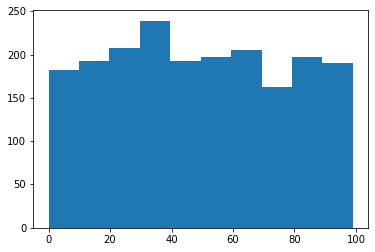

In [19]:
# Visualize the distribution of a variable

plt.hist(df['Age'])

(array([ 52.,  49., 126., 286., 291., 233., 231., 248., 218., 231.]),
 array([     0. ,  18997.4,  37994.8,  56992.2,  75989.6,  94987. ,
        113984.4, 132981.8, 151979.2, 170976.6, 189974. ]),
 <BarContainer object of 10 artists>)

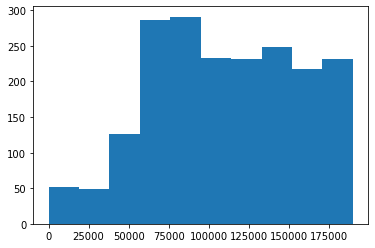

In [20]:
# Visualize the distribution of a variable
plt.hist(df['Annual Income ($)'])


(array([142., 194., 178., 198., 250., 231., 179., 187., 193., 213.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

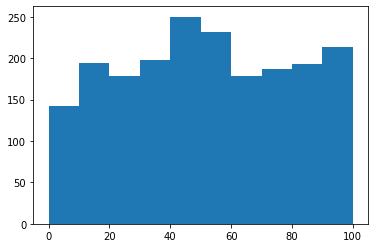

In [21]:
# Visualize the distribution of a variable
plt.hist(df['Spending Score (1-100)'])

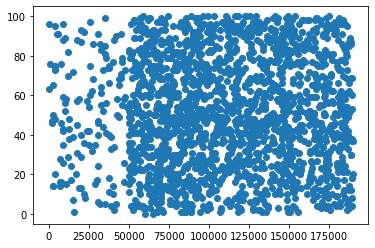

In [22]:
# Plot a scatterplot of two variables
plt.scatter(df['Annual Income ($)'], df['Spending Score (1-100)'])

## Performing customer segmentation to identify different group of customers 

In [23]:
# Use k-means clustering to group customers based on their spending score(1-100) and Annual income

from sklearn.cluster import KMeans


In [40]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(df[['Annual Income ($)', 'Spending Score (1-100)']])

KMeans(n_clusters=3, random_state=42)

In [41]:
# Find the centroids of the clusters
centroids = model.cluster_centers_
print(centroids)

[[1.05655024e+05 5.13414986e+01]
 [1.61486572e+05 5.22850941e+01]
 [5.59459500e+04 4.93275862e+01]]


In [42]:
model.labels_

array([2, 2, 0, ..., 0, 1, 0])

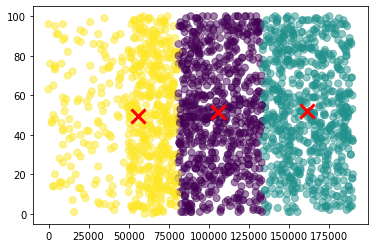

In [43]:
# Display the clusters contents and their centroids
plt.scatter(df['Annual Income ($)'], df['Spending Score (1-100)'], c= model.labels_.astype(float), s=50, alpha=0.5 )

plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.show()

In [44]:
# Add cluster labels to the DataFrame
df['cluster'] = model.labels_

##  Analyse the results of customer segmentation

In [45]:
# Calculate the mean income and spending for each cluster
df.groupby('cluster').mean()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
cluster,,,,,,
0,1064.602305,50.894813,105731.059078,51.233429,4.214697,3.763689
1,1144.507246,48.473913,161527.057971,52.350725,4.327536,3.943478
2,752.263339,47.005164,55988.698795,49.383821,3.667814,3.528399


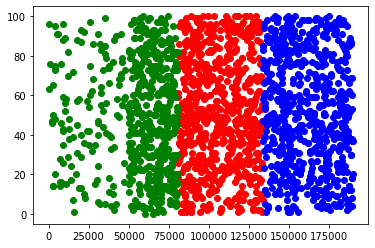

In [46]:
# Visualize the different customer segments
plt.scatter(df[df['cluster'] == 0]['Annual Income ($)'], df[df['cluster'] == 0]['Spending Score (1-100)'], color='red')
plt.scatter(df[df['cluster'] == 1]['Annual Income ($)'], df[df['cluster'] == 1]['Spending Score (1-100)'], color='blue')
plt.scatter(df[df['cluster'] == 2]['Annual Income ($)'], df[df['cluster'] == 2]['Spending Score (1-100)'], color='green')

## Using machine Learning to predict customer behaviour

In [47]:
# Build a predictive model to predict whether a customer will make a purchase
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [48]:
X = df[['Age', 'cluster']]
y = df['Spending Score (1-100)']


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [51]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\georg\anaconda3\conda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
# use the model to make predictions on the test data

y_pred = model.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix

# evaluate the performance of the model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.01272264631043257
